
WENDY ACHIENG MUDENYO


**Introduction**

For this project , i will use the "Salary_Data.CSV" to perform Simple Linear Regression. 

Uploading the data to be used.

In [1]:
import pandas as pd
import numpy as np

In [2]:
Salary_Data = pd.read_csv('Salary_Data.csv')

In [3]:
Salary_Data.head(10).T

,0,1,2,3,4,5,6,7,8,9
YearsExperience,1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7
Salary,39343.0,46205.0,37731.0,43525.0,39891.0,56642.0,60150.0,54445.0,64445.0,57189.0


**Here i Checked if our Salary_Data has Null Values which is part of Data Cleaning**

In [4]:
Salary_Data.isna().T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**Here i categorize our data into dependent(y) and independent variables(X)**

---



In [6]:
X = Salary_Data.iloc[:,:-1].values
y = Salary_Data.iloc[:, 1].values

In [7]:
Salary_Data.sample(10).T

,15,28,3,13,12,16,19,17,29,2
YearsExperience,4.9,10.3,2.0,4.1,4.0,5.1,6.0,5.3,10.5,1.5
Salary,67938.0,122391.0,43525.0,57081.0,56957.0,66029.0,93940.0,83088.0,121872.0,37731.0


**SALARY DATA OBSERVATION**

***FINDING INSIGHTS FROM OUR DATA***

In [8]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


 Visualizing our Salary Data to find more Insights**

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

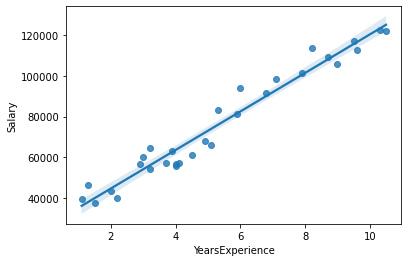

In [9]:
import seaborn as sns

# We will first draw a Regression plot using seaborn to check for the line of best fit

sns.regplot(x='YearsExperience',
            y='Salary',
            data=Salary_Data)

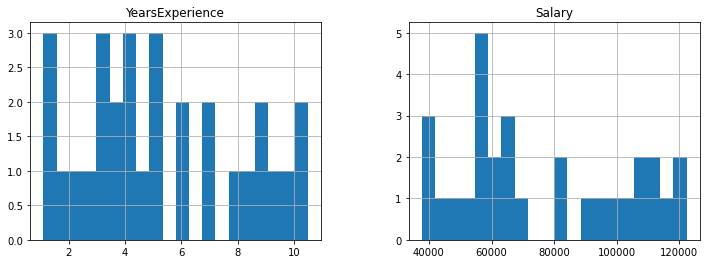

In [10]:
import matplotlib.pyplot as plt

#Visualizing our salary data using histograms

Salary_Data.hist(bins=20, figsize=(12,4))
plt.show()

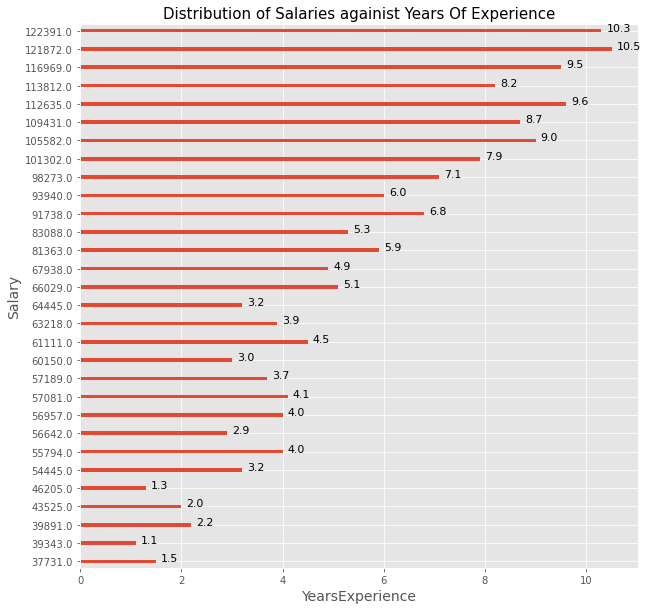

In [11]:
plt.style.use("ggplot")

subplot=Salary_Data.groupby('Salary')['YearsExperience'].sum().plot(kind='barh', width=0.2,figsize=(10,10))
subplot.set_title('Distribution of Salaries againist Years Of Experience', fontsize=15)
subplot.set_xlabel('YearsExperience', fontsize=14)
subplot.set_ylabel('Salary', fontsize=14)
for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()),fontsize=11)

As we can see from the above chart the more the years of experience the  more the salary

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

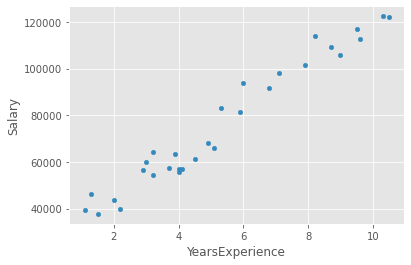

In [12]:
Salary_Data.plot.scatter(x='YearsExperience',y='Salary')

**Checking for Correlations in my Data between our two columns**

In [13]:
corr_matrix = Salary_Data.corr()

In [14]:
corr_matrix["YearsExperience"].sort_values(ascending=False)
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


####Checking for the shape and size of our data

In [15]:
Salary_Data.shape

(30, 2)

In [16]:
Salary_Data.size

60

**I will then Transform our training and testing data that we have split above using the reshape function into 2Dimension in order for scikit learn to manipulate it**

In [17]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

**Spliting my data into training and testing sets**

We will allocate 30% of our data for testing and 70% for training

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Here i'm Training my Model** **bold text**

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr_reg = LinearRegression()

lr_reg.fit(X_train,y_train)

LinearRegression()

Let us check for the coefficiency and intercept of our model

In [21]:
print("Coefficients: ", lr_reg.coef_)
print("Intercept: ", lr_reg.intercept_)

Coefficients:  [[9360.26128619]]
Intercept:  [26777.3913412]


I will Get the Prediction of the Salries from our model

In [22]:
Salary_prediction = lr_reg.predict(X_test)
Salary_prediction.T

array([[ 40817.78327049, 123188.08258899,  65154.46261459,
         63282.41035735, 115699.87356004, 108211.66453108,
        116635.89968866,  64218.43648597,  76386.77615802]])

**Now i'm going to compare the Actual Salaries with our predicted Salaries based on Years Of Experience**

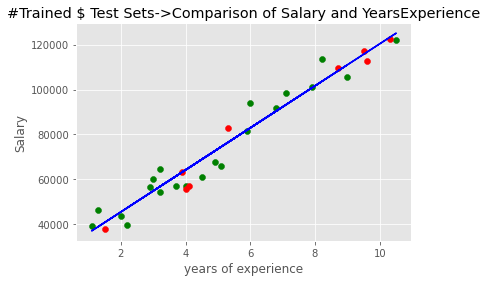

In [23]:
plt.scatter(X_train,y_train, color='green',)
plt.scatter(X_test,y_test, color='red',)
plt.plot(X_train,lr_reg.predict(X_train), color='blue')
plt.title('#Trained $ Test Sets->Comparison of Salary and YearsExperience')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

**Lastly i will Audit our Model by checking for the Accuracy and loss of our Model**

In [24]:
from sklearn.metrics import r2_score

accuracy_score = []

accuracy_score.append(r2_score(y_test,Salary_prediction))

ac = (r2_score(y_test,Salary_prediction))

print("The Accuracy Score Of our Model is:",ac)

The Accuracy Score Of our Model is: 0.9740993407213511


**Finding the Mean Squared Error (MSE)**

In [25]:
from sklearn.metrics import mean_squared_error

MSE = []

MSE.append(mean_squared_error(y_test,Salary_prediction))

mean_squared_error = (mean_squared_error(y_test,Salary_prediction))

print("The MSE Of our Model is:",mean_squared_error)


The MSE Of our Model is: 23370078.800832972
